In [62]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


## 1. Changes across countries 
### a. Visualize mean life ladder score across the countries
### b. Compare the improvement rate across the countries
### 

In [107]:
happy = pd.read_csv("./data/whr-2023.csv")
happy.head(15)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.044,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.119,0.954,0.435,0.371


In [52]:
happy_vars = happy.loc[:,~happy.columns.isin(['Country name','year'])]

#### Number of Countries

In [92]:
# print(happy['Country name'].unique())
len(happy['Country name'].unique())

165

### a. Visualize mean life ladder score across the countries

In [86]:
mean_values = happy.groupby('Country name').mean().loc[:, 'Life Ladder':]
mean_life_ladder = mean_values['Life Ladder']
mean_life_ladder_df = mean_life_ladder.reset_index()
mean_life_ladder_df.columns = ['Country name', 'Life Ladder'];mean_life_ladder

Country name
Afghanistan    3.346643
Albania        5.047933
Algeria        5.377400
Angola         4.420250
Argentina      6.283588
                 ...   
Vietnam        5.385353
Yemen          3.912250
Zambia         4.453733
Zimbabwe       3.805294
eSwatini       4.491667
Name: Life Ladder, Length: 165, dtype: float64

/var/folders/q_/_cgc3knd02ncvyg87h9rg1rh0000gn/T/ipykernel_57337/3966592051.py:32: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


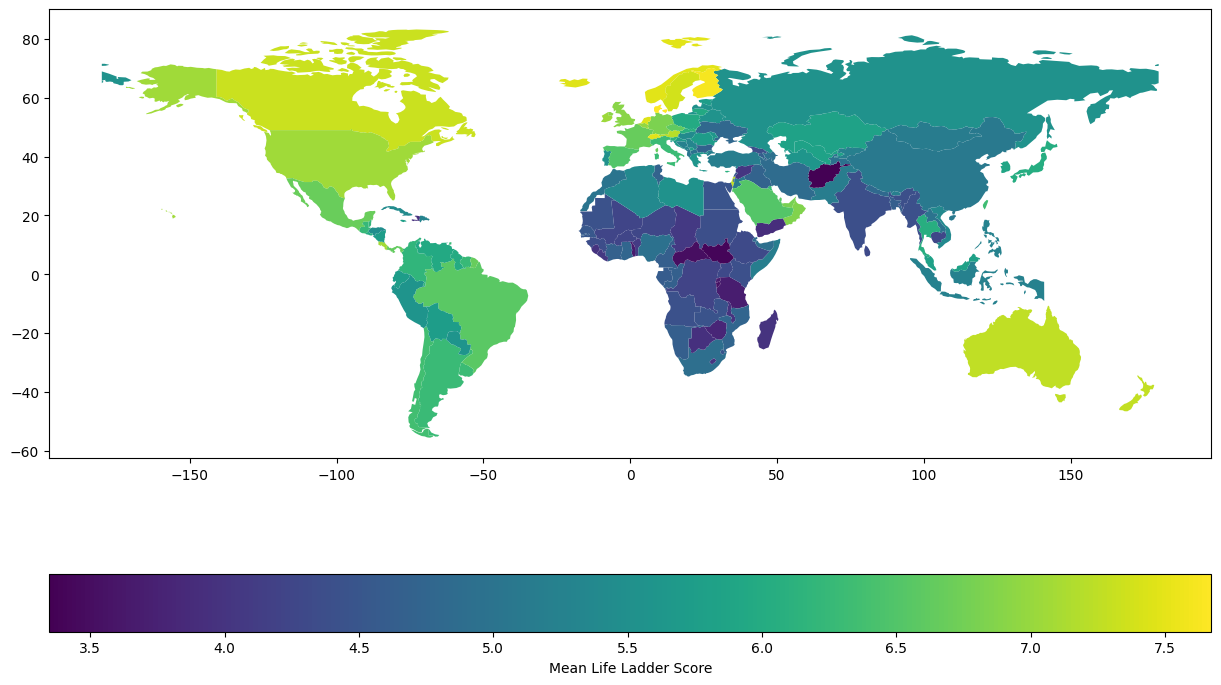

In [91]:
country_names = world['name'].tolist()
# print(country_names)

non_matching_countries = [country for country in mean_life_ladder_df['Country name'].unique() if country not in country_names]

# print("Countries in 'happy' DataFrame that don't match 'world':")
# print(non_matching_countries)

name_mapping = {
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Central African Republic': 'Central African Rep.',
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'Eswatini': 'eSwatini',
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Ivory Coast': "Côte d'Ivoire",
    'Maldives': 'Maldives',
    'Malta': 'Malta',
    'Mauritius': 'Mauritius',
    'Singapore': 'Singapore',
    'Somaliland region': 'Somaliland',
    'South Sudan': 'S. Sudan',
    'State of Palestine': 'Palestine',
    'Taiwan Province of China': 'Taiwan',
    'Turkiye': 'Turkey',
    'United States': 'United States of America',}

mean_life_ladder_df['Country name'] = mean_life_ladder_df['Country name'].replace(name_mapping)
# print(len(mean_life_ladder_df['Country name'].unique()))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.set_index('name').join(mean_life_ladder_df.set_index('Country name'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Life Ladder', ax=ax, legend=True, 
            legend_kwds={'label': "Mean Life Ladder Score", 'orientation': "horizontal"})
plt.show()

### b. Compare the improvement rate across the countries

/var/folders/q_/_cgc3knd02ncvyg87h9rg1rh0000gn/T/ipykernel_57337/2987927164.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


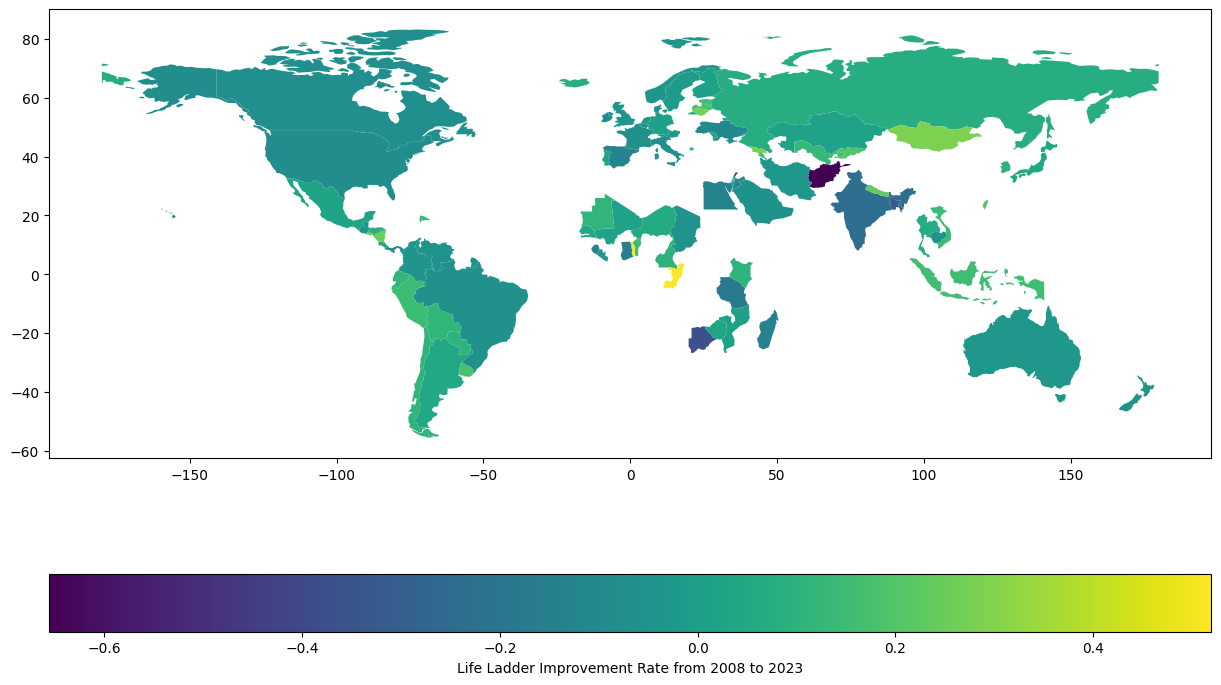

In [110]:
happy_2008 = happy[happy['year'] == 2008]
happy_2023 = happy[happy['year'] == 2022]

happy_merged = pd.merge(happy_2008[['Country name', 'Life Ladder']], happy_2023[['Country name', 'Life Ladder']], on='Country name', suffixes=('_2008', '_2023'))
happy_merged['Improvement Rate'] = (happy_merged['Life Ladder_2023'] - happy_merged['Life Ladder_2008']) / happy_merged['Life Ladder_2008']

happy_merged['Country name'] = happy_merged['Country name'].replace(name_mapping)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['name', 'geometry']]

world = world.merge(happy_merged[['Country name', 'Improvement Rate']], left_on='name', right_on='Country name', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Improvement Rate', ax=ax, legend=True,
           legend_kwds={'label': "Life Ladder Improvement Rate from 2008 to 2023", 'orientation': "horizontal"})
plt.show()

In [104]:
happy_2023

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect


In [34]:
average_values = happy.groupby('Country name')['Life Ladder'].mean().reset_index()

bar_chart = alt.Chart(average_values).mark_bar().encode(
    x='Region:N',
    y='Life Ladder:Q'
).properties(width=600, height=400)

bar_chart

alt.Chart(...)